In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from scipy.misc import imread
import csv
# from tqdm import tqdm
import sys
from os import listdir
from os.path import join, splitext, basename
from sklearn.neighbors import DistanceMetric

In [2]:
bic_cascade = cv2.CascadeClassifier('bicycle.xml')
bus_cascade = cv2.CascadeClassifier('bus.xml')
car_cascade = cv2.CascadeClassifier('car.xml')
motor_cascade = cv2.CascadeClassifier('motor.xml')
non_motor_cascade = cv2.CascadeClassifier('non_motor.xml')
pedastrian_cascade = cv2.CascadeClassifier('pedastrain.xml')
pickup_truck_cascade = cv2.CascadeClassifier('pickup_truck.xml')
singleunit_truck_cascade = cv2.CascadeClassifier('singleunit_truck.xml')
truck_cascade = cv2.CascadeClassifier('truck.xml')
work_van = cv2.CascadeClassifier('work_van.xml')

obj_cascade = [bic_cascade, bus_cascade, car_cascade, motor_cascade, non_motor_cascade, pedastrian_cascade, pickup_truck_cascade,
              singleunit_truck_cascade, truck_cascade, work_van]




Reading images from image_folder...

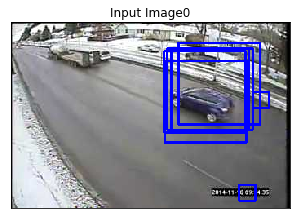

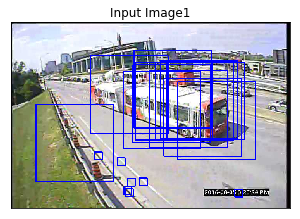

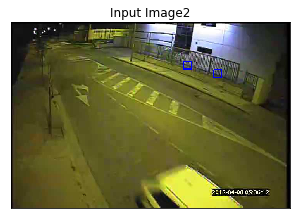

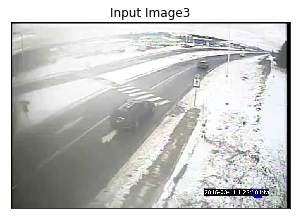

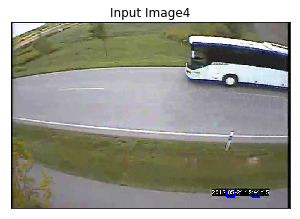

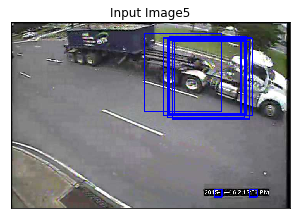

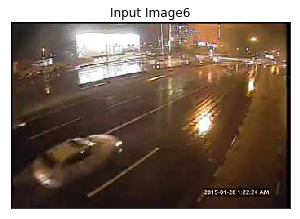

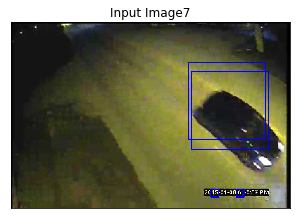

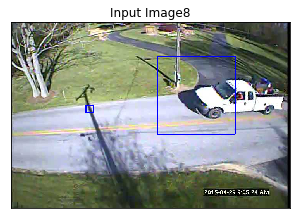

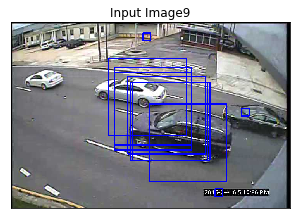

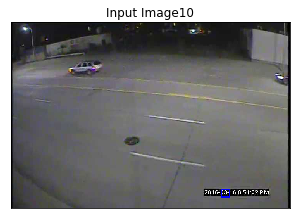

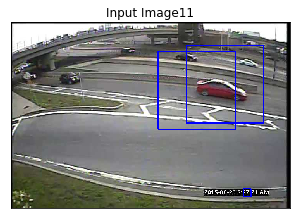

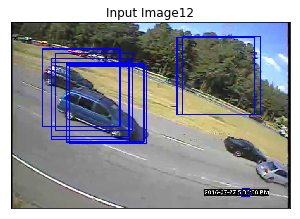

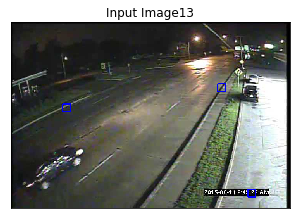

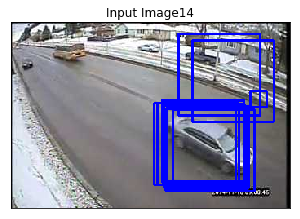

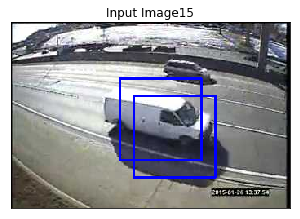

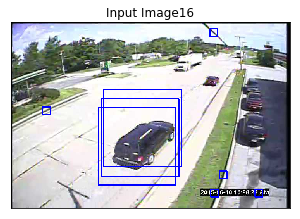

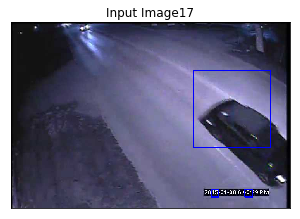

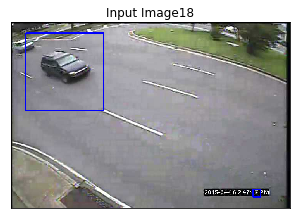

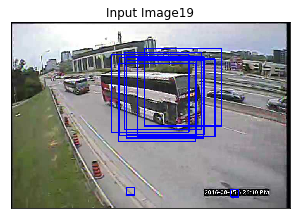

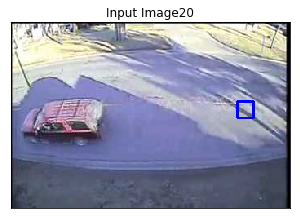

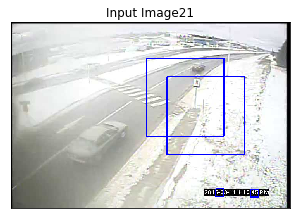

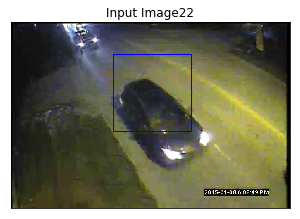

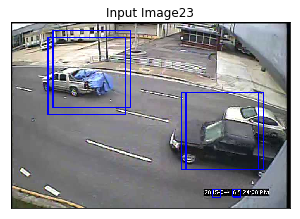

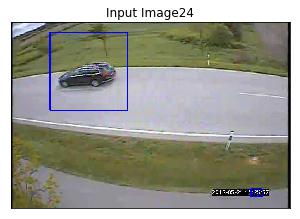

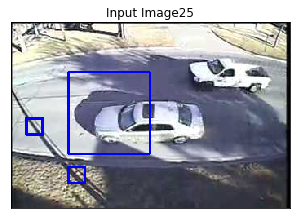

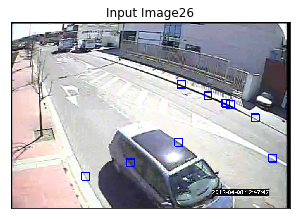

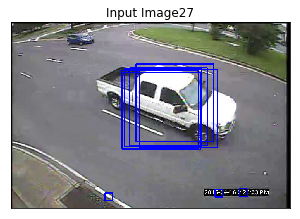

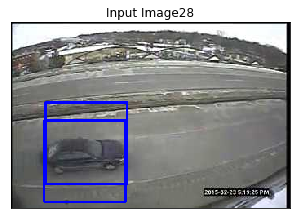

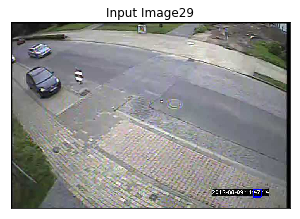

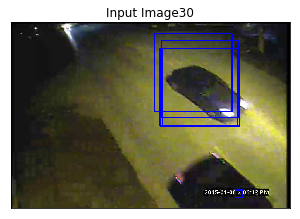

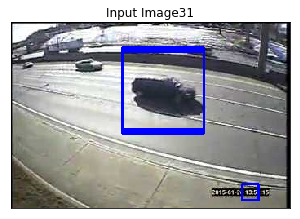

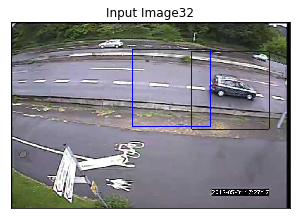

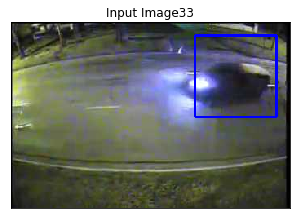

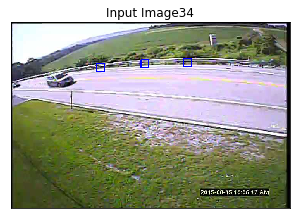

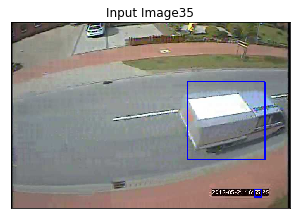

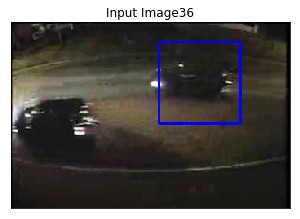

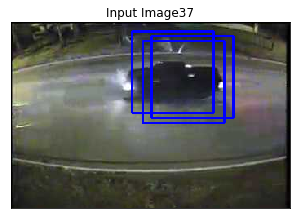

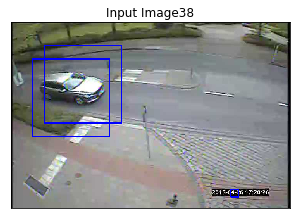

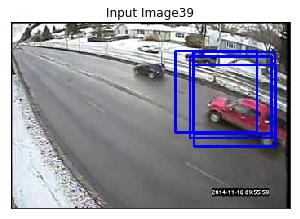

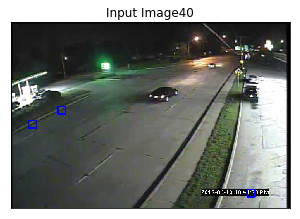

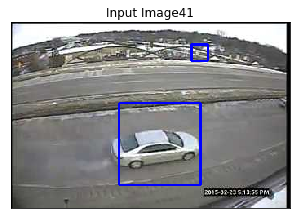

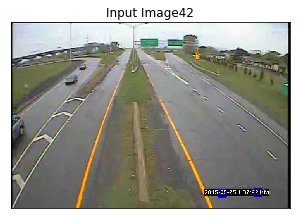

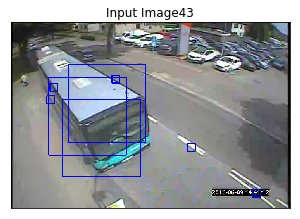

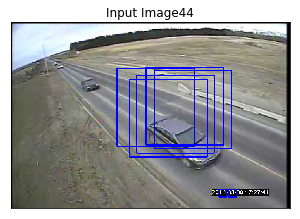

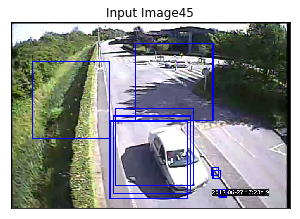

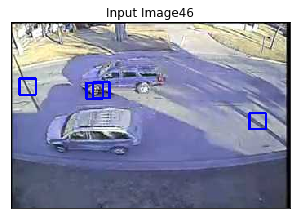

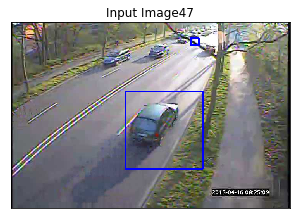

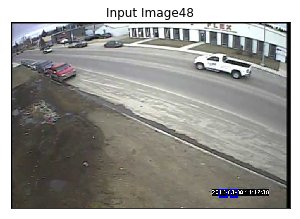

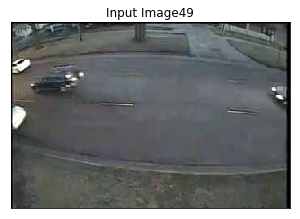

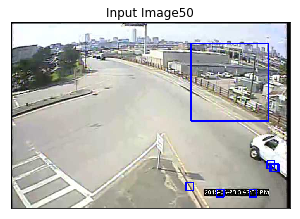

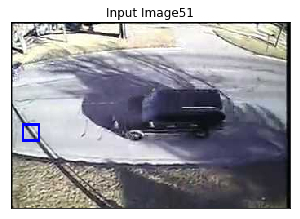

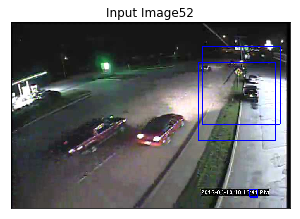

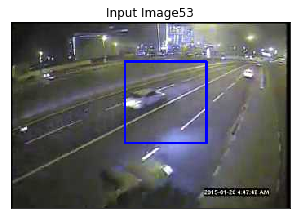

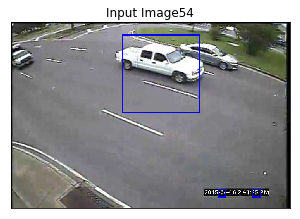

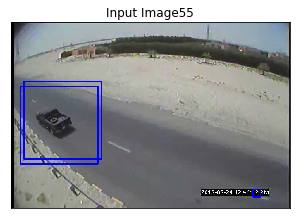

In [3]:
img_list = []

Len = 10

objloc = []

# load all the images in greyscale and store them into an array
path = "image_folder"

print("Reading images from " + path, end="...")

i = 0 # counter to loop the img_list

for filePath in sorted(os.listdir(path)):
    fileExt = os.path.splitext(filePath)[1]
    if fileExt in [".png", ".jpeg",".jpg"]:
        imagePath = os.path.join(path, filePath)
        img_gray = cv2.imread(imagePath,cv2.COLOR_BGR2GRAY)
        im = cv2.resize(img_gray, None, fx=1, fy=1)
        if im is None :
                print("image:{} not read properly".format(imagePath))
        else :
            img_list.append(im)
            _, size, _ = img_list[i].shape

                
    


#for i in range(Len):
    #img_list.append(cv2.imread("0000000"+str(i)+".jpg",1))
    #img_list[i] = cv2.resize(img_list[i], None, fx=1, fy=1)
    #img_gray = cv2.cvtColor(img_list[i], cv2.COLOR_BGR2GRAY)
    # detect faces
    # detectMultiScape(image, scaleFactor, minNeighbors)
    # scaleFactor - parameter specifying how much the image size is reduced
    #  at each image scale
    # minNeighbors - parameter specifying how many neighbors each candidate
    #  rectangle should have to retain
    #_, size, _ = img_list[i].shape
    #print(img_list[i].shape)
    
    
    for j in range(len(obj_cascade)):
        if(size > 500):
            obj = obj_cascade[j].detectMultiScale(img_gray, 10,30)

        if(size < 500):
            obj = obj_cascade[j].detectMultiScale(img_gray, 5,30)

        #print(obj)
        for (x,y,w,h) in obj:
            cv2.rectangle(img_list[i], (x,y), (x+w, y+h), (255,0,0), 2)
            x2 = x + w - 1
            y2 = y + h - 1
            objloc.append([i, x, y, x2, y2])
    # display images
    
    plt.figure(figsize=(5,5))
    #plt.subplot(5,2,i-1)
    plt.imshow(cv2.cvtColor(img_list[i], cv2.COLOR_BGR2RGB))
    plt.title("Input Image" + str(i)), plt.xticks([]), plt.yticks([])
    plt.show()
    i=i+1
    

In [4]:
ground_truth_label = []

with open('gt_test.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        ground_truth_label.append(row)

In [5]:
print(ground_truth_label)

[['00000000', 'pickup_truck', '213', '34', '255', '50'], ['00000000', 'car', '194', '78', '273', '122'], ['00000000', 'car', '155', '27', '183', '35'], ['00000000', 'articulated_truck', '43', '25', '109', '55'], ['00000000', 'car', '106', '32', '124', '45'], ['00000001', 'bus', '205', '155', '568', '314'], ['00000001', 'bus', '285', '123', '477', '168'], ['00000001', 'car', '544', '162', '617', '193'], ['00000001', 'car', '329', '152', '371', '163'], ['00000001', 'car', '447', '161', '497', '183'], ['00000001', 'car', '662', '199', '715', '236'], ['00000002', 'motorized_vehicle', '334', '362', '603', '479'], ['00000003', 'car', '480', '99', '511', '120'], ['00000003', 'car', '257', '199', '369', '280'], ['00000004', 'bus', '439', '32', '719', '171'], ['00000005', 'car', '561', '85', '605', '129'], ['00000005', 'articulated_truck', '132', '3', '712', '254'], ['00000006', 'car', '22', '135', '136', '204'], ['00000007', 'car', '471', '175', '708', '386'], ['00000008', 'pickup_truck', '471

In [6]:
print(objloc)

[[0, 191, 32, 290, 131], [0, 188, 47, 287, 146], [0, 205, 25, 304, 124], [0, 279, 199, 298, 218], [0, 196, 32, 295, 131], [0, 296, 85, 315, 104], [0, 187, 35, 286, 134], [1, 295, 430, 314, 449], [1, 402, 103, 601, 302], [1, 205, 87, 404, 286], [1, 64, 212, 263, 411], [1, 289, 127, 488, 326], [1, 317, 73, 516, 272], [1, 430, 154, 629, 353], [1, 385, 100, 584, 299], [1, 577, 431, 596, 450], [1, 291, 425, 310, 444], [1, 373, 105, 572, 304], [1, 215, 335, 234, 354], [1, 300, 403, 319, 422], [1, 394, 146, 593, 345], [1, 314, 110, 513, 309], [1, 320, 104, 519, 303], [1, 274, 350, 293, 369], [1, 331, 402, 350, 421], [1, 358, 124, 557, 323], [2, 523, 123, 542, 142], [2, 445, 101, 464, 120], [3, 626, 431, 645, 450], [4, 621, 431, 640, 450], [4, 557, 431, 576, 450], [5, 393, 41, 592, 240], [5, 416, 50, 615, 249], [5, 615, 431, 634, 450], [5, 524, 431, 543, 450], [5, 408, 37, 607, 236], [5, 343, 30, 542, 229], [5, 406, 40, 605, 239], [5, 422, 41, 621, 240], [5, 403, 46, 602, 245], [7, 465, 128, 6

In [7]:
ground_truth = []
for i in range(len(ground_truth_label)):
    temp = [int(ground_truth_label[i][0]), int(ground_truth_label[i][2]), int(ground_truth_label[i][3]), 
            int(ground_truth_label[i][4]), int(ground_truth_label[i][5])]
    ground_truth.append(temp)
print(ground_truth)

[[0, 213, 34, 255, 50], [0, 194, 78, 273, 122], [0, 155, 27, 183, 35], [0, 43, 25, 109, 55], [0, 106, 32, 124, 45], [1, 205, 155, 568, 314], [1, 285, 123, 477, 168], [1, 544, 162, 617, 193], [1, 329, 152, 371, 163], [1, 447, 161, 497, 183], [1, 662, 199, 715, 236], [2, 334, 362, 603, 479], [3, 480, 99, 511, 120], [3, 257, 199, 369, 280], [4, 439, 32, 719, 171], [5, 561, 85, 605, 129], [5, 132, 3, 712, 254], [6, 22, 135, 136, 204], [7, 471, 175, 708, 386], [8, 471, 131, 702, 249], [9, 36, 123, 135, 172], [9, 75, 44, 114, 70], [9, 109, 42, 142, 66], [9, 141, 41, 193, 70], [9, 214, 141, 402, 222], [9, 548, 214, 707, 297], [9, 307, 223, 571, 363], [10, 147, 96, 238, 135]]


In [8]:
objloc_tmp = []
ground_truth_tmp = []

for i in range(len(ground_truth_label)):
    temp = [int(ground_truth_label[i][0]), int(ground_truth_label[i][2]), int(ground_truth_label[i][3])]
    ground_truth_tmp.append(temp)
    
for i in range(len(objloc)):
    temp = [int(objloc[i][0]), int(objloc[i][1]), int(objloc[i][2])]
    objloc_tmp.append(temp)

pic = 0

group = []
# store the index of objloc that has the best fit
index = []

threshold = 20

dist = DistanceMetric.get_metric('euclidean')

for i in range(len(objloc_dist)):
    # group cotain all objloc with same pic 
    if(objloc_dist[i][0] == pic):
        del objloc_tmp[i][0]
        #print(objloc_tmp)
        group.append(objloc_tmp[i])

        
    if(objloc[i][0] != pic):
        for j in range(len(ground_truth_dist)):
            if(ground_truth_dist[j][0] == pic):
                del ground_truth_tmp[j][0]
                test = np.vstack((ground_truth_tmp[j],group))
                distance = dist.pairwise(test)
                for j in range(len(distance)):
                    for k in range(len(distance)):
                        if(distance[j][k] == 0):
                            distance[j][k]=distance.max()
                #print(distance)
                L2 = np.min(distance, axis=1)
                #print(L2)
                print(L2.min())
                if(L2.min()<threshold):
                    index.append([pic, np.argmin(L2)])
        pic = pic + 1


NameError: name 'objloc_dist' is not defined

In [ ]:
print(objloc_dist)

In [ ]:
print(index)